<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-2/blob/master/Challenge_Validating_a_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

###  GridSearchCV Regression vs Linear Regression vs Stats.model OLS 
#https://stats.stackexchange.com/questions/153131/gridsearchcv-regression-vs-linear-regression-vs-stats-model-ols

In [0]:
def clean_fbi(x):
  data_path = x
  df = pd.read_csv(data_path, delimiter= ',')

#drop the first 4 rows of data as they aren't needed
  df = df.drop([0,1,2,3])

#remove the last 3 rows as they aren't needed either
  df = df.iloc[:len(df)-3]


# there aren't many columns just clean them by hand
  df.columns = ['City',	'Population',	'Violent',	'Murder', 	'Rape_revised',	'Rape_legacy',	'Robbery',	'Aggravated_assault',	'Property_crime',	'Burglary',	'Larceny_theft',	'Motor_vehicle_theft',	'Arson']

# lots of NaN values lets just fill them in with 0s
  df.fillna(0,inplace=True)

# drop all the columns not used for the regression model
  df=df.loc[:,['City','Population','Violent','Robbery','Burglary', 'Motor_vehicle_theft','Aggravated_assault']]
  df.set_index('City',inplace=True)

#remove ','
  df = df.apply(lambda x: x.str.replace(',',''))

#turn columns into integars
  df = df.apply(lambda x: pd.to_numeric(x,errors='coerce'))
  return df


In [19]:
New_york_2013 = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv"

dfNY13 = clean_fbi(New_york_2013)

dfNY13


,Population,Violent,Robbery,Burglary,Motor_vehicle_theft,Aggravated_assault
City,,,,,,
Adams Village,1861,0,0,2,0,0
Addison Town and Village,2577,3,0,3,1,3
Akron Village,2846,3,0,1,0,3
Albany,97956,791,227,705,142,526
Albion Village,6388,23,4,53,5,16
Alfred Village,4089,5,3,10,0,2
Allegany Village,1781,3,0,0,0,3
Amherst Town,118296,107,31,204,32,68
Amityville Village,9519,9,4,16,6,3


### Linear regression of standard model

In [17]:
dfNY13.describe()

,Population,Violent,Robbery,Burglary,Motor_vehicle_theft,Aggravated_assault
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,201.594828,72.902299,119.683908,35.905172,121.261494
std,4.500374e+05,2815.268504,1031.032873,924.948789,403.423826,1706.131730
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,6.000000,0.000000,1.000000
50%,7.233500e+03,6.000000,1.000000,17.500000,2.000000,4.000000
75%,1.842750e+04,22.000000,5.000000,51.250000,7.000000,14.000000
max,8.396126e+06,52384.000000,19170.000000,16606.000000,7434.000000,31767.000000


In [0]:
import math

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [0]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Property_crime ~ Population+Murder+Robbery+Violent+Aggravated_assault'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=dfNY13).fit()

In [0]:
lm.params

Intercept             32.868465
Population             0.012119
Murder                13.542220
Robbery              -61.848281
Violent               61.284592
Aggravated_assault   -62.612300
dtype: float64

In [18]:
correlation_matrix = dfNY13.corr()
display(correlation_matrix)

# Lot's of colinearity going on here.

,Population,Violent,Robbery,Burglary,Motor_vehicle_theft,Aggravated_assault
Population,1.000000,0.998854,0.998469,0.970578,0.992421,0.999134
Violent,0.998854,1.000000,0.999923,0.978150,0.996271,0.999942
Robbery,0.998469,0.999923,1.000000,0.979525,0.996927,0.999742
Burglary,0.970578,0.978150,0.979525,1.000000,0.991464,0.976288
Motor_vehicle_theft,0.992421,0.996271,0.996927,0.991464,1.000000,0.995403
Aggravated_assault,0.999134,0.999942,0.999742,0.976288,0.995403,1.000000


We can see from the correlation matrix above that just about every variable is co-linear ... hmmm

In [0]:
lm.pvalues

Intercept             4.330163e-02
Population            6.520551e-36
Murder                4.774111e-01
Robbery               8.934946e-40
Violent               6.981796e-37
Aggravated_assault    6.949373e-35
dtype: float64

In [0]:
lm.rsquared

0.9990024878038868

This R^2 seems is really high, and is probably over fitting due to some outlier issues

In [0]:
lm.conf_int()

,0,1
Intercept,0.994986,64.741944
Population,0.010429,0.013809
Murder,-23.907826,50.992266
Robbery,-69.912314,-53.784249
Violent,52.884226,69.684958
Aggravated_assault,-71.513175,-53.711425


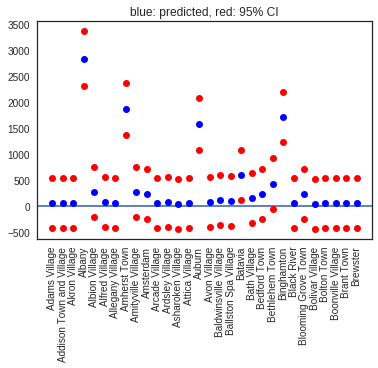

In [0]:
##### Let's graph the confidence intervals

# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.xticks(rotation=90)
plt.axhline(y=0)
plt.plot(iv_u[0:30], 'o', color='r')
plt.plot(iv_l[0:30], 'o', color='r')
plt.plot(lm.fittedvalues[0:30], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [0]:
##### Before getting wild with more data columns lets test this model on another data set.

# recall that property crime is merely the sum of ('Burglary',	'Larceny_theft',	'Motor_vehicle_theft')

#train = lm.params
## Let's test our skills and build the model by hand

### recall our trained model is 'Property_crime ~ Population+Murder+Robbery' ###

 ### or  y = population*train[1]+murder*train[2]+Robbery*train[3]+train[0]
## IN DF containing population murder and robbery columns  

from sklearn import linear_model
df = dfNY13
#store this model for later
regr = linear_model.LinearRegression()
Y = df['Property_crime'].values.reshape(-1, 1)
X = df.loc[:,df.columns !='Property_crime']
regr.fit(X, Y)

# Inspect the results.

#  Population+Murder+Robbery+Violent+Aggravated_assault
print('\nIndependant Variables:','\n   Population      ','Murder     ','Robbery    ','Violent      ','Aggravated_assault    ')
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))




Independant Variables: 
   Population       Murder      Robbery     Violent       Aggravated_assault    

Coefficients: 
 [[ 1.21189893e-02  1.35422200e+01 -6.18482813e+01  6.12845922e+01
  -6.26123000e+01]]

Intercept: 
 [32.86846523]

R-squared:
0.9990024878038867


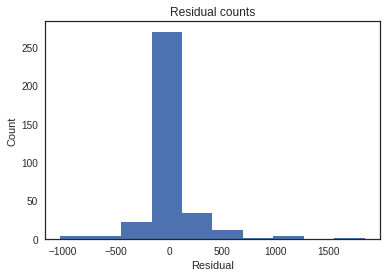

In [0]:
predicted = regr.predict(X).ravel()
actual = df['Property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()



Now that we've built this model let's test it on some other data. Lets try a completely different state in the same year.

My hpyothesis is that our current model should explain less t han 60% of the variance for Oregon in 2013

In [0]:
data_path = "https://raw.githubusercontent.com/zdwhite/Thinkful-Unit-2/master/Linear%20Regression/table_8_offenses_known_to_law_enforcement_oregon_by_city_2013.csv"

In [0]:
dfOR13= clean_fbi(data_path)
#dfOR13 = df = pd.read_csv(data_path, delimiter= ',')

In [0]:
dfOR13

,Population,Murder,Robbery,Property_crime,Violent,Aggravated_assault
City,,,,,,
Albany,51645.0,0,27,2019,40,5
Amity,1624.0,0,0,26,1,0
Ashland,20455.0,0,7,674,33,21
Astoria,9543.0,0,1,445,33,29
Athena,1144.0,0,0,25,1,0
Aumsville,3738.0,0,1,82,6,5
Baker City,9660.0,0,2,370,27,24
Bandon,3039.0,0,1,88,1,0
Banks,1862.0,0,0,26,4,4


In [0]:
dfOR13= clean_fbi(data_path)
dfOR13.fillna(0,inplace=True)


In [0]:
dfOR13.describe()

,Population,Murder,Robbery,Property_crime,Violent,Aggravated_assault
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,23350.055556,0.416667,19.981481,906.675926,67.888889,39.925926
std,63662.719063,1.600963,94.294724,3050.571728,295.689321,177.520866
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2492.750000,0.000000,0.000000,54.000000,2.000000,1.000000
50%,8575.000000,0.000000,1.000000,287.000000,10.500000,5.000000
75%,19312.750000,0.000000,7.250000,613.500000,33.000000,22.250000
max,609136.000000,14.000000,917.000000,29633.000000,2941.000000,1776.000000


Looks like there are some cities with out population data, these should be dropped.

In [0]:
dfOR13=dfOR13[dfOR13['Population']>0]

In [0]:
dfOR13.describe()

,Population,Murder,Robbery,Property_crime,Violent,Aggravated_assault
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,23790.622642,0.424528,20.358491,922.981132,69.150943,40.660377
std,64183.794700,1.615096,95.147824,3077.129318,298.346612,179.121448
min,607.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2732.750000,0.000000,0.000000,55.250000,2.000000,1.250000
50%,8665.000000,0.000000,1.000000,296.500000,11.000000,5.500000
75%,20074.250000,0.000000,7.750000,614.500000,33.000000,22.750000
max,609136.000000,14.000000,917.000000,29633.000000,2941.000000,1776.000000


In [0]:
from sklearn import linear_model


df = dfOR13
#regr = linear_model.LinearRegression()
Y = df['Property_crime'].values.reshape(-1, 1)
X = df.loc[:,df.columns !='Property_crime']
#regr.fit(X, Y)

#  Population+Murder+Robbery+Violent+Aggravated_assault
print('\nIndependant Variables:','\n   Population      ','Murder     ','Robbery    ','Violent      ','Aggravated_assault    ')
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Independant Variables: 
   Population       Murder      Robbery     Violent       Aggravated_assault    

Coefficients: 
 [[ 1.21189893e-02  1.35422200e+01 -6.18482813e+01  6.12845922e+01
  -6.26123000e+01]]

Intercept: 
 [32.86846523]

R-squared:
0.8837403494351268


In [0]:
predicted = regr.predict(X).ravel()

In [0]:
predicted

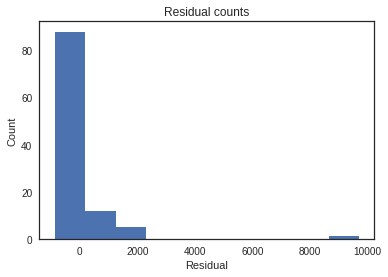

In [0]:

actual = dfOR13['Property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
